# Import Libraries

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Plot Examples

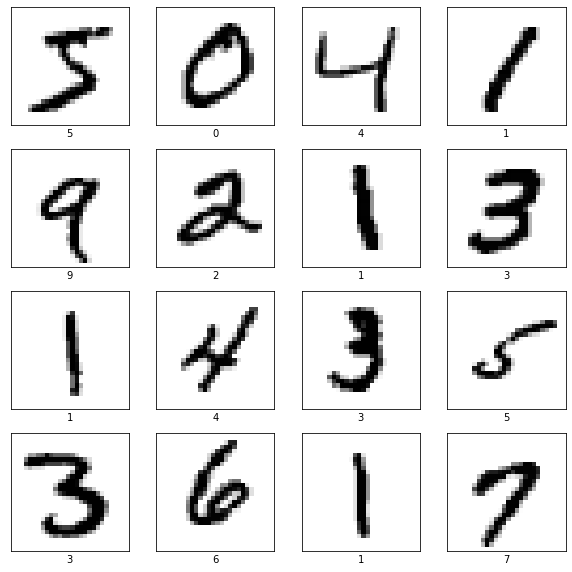

In [3]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Normalize Data

In [4]:
x_train = np.reshape(x_train, (60000, 784))
x_train = x_train / 255.

x_test = np.reshape(x_test, (10000, 784))
x_test = x_test / 255.

# Create a Neural Network Model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

In [16]:
_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50, batch_size=1024,
    verbose=2
)

Epoch 1/50
59/59 - 0s - loss: 2.2141 - accuracy: 0.2686 - val_loss: 1.9488 - val_accuracy: 0.4438
Epoch 2/50
59/59 - 0s - loss: 1.6371 - accuracy: 0.5169 - val_loss: 1.3110 - val_accuracy: 0.6072
Epoch 3/50
59/59 - 0s - loss: 1.1273 - accuracy: 0.6680 - val_loss: 0.9574 - val_accuracy: 0.7654
Epoch 4/50
59/59 - 0s - loss: 0.8632 - accuracy: 0.7925 - val_loss: 0.7537 - val_accuracy: 0.8296
Epoch 5/50
59/59 - 0s - loss: 0.6827 - accuracy: 0.8439 - val_loss: 0.5994 - val_accuracy: 0.8683
Epoch 6/50
59/59 - 0s - loss: 0.5457 - accuracy: 0.8789 - val_loss: 0.4877 - val_accuracy: 0.8927
Epoch 7/50
59/59 - 0s - loss: 0.4464 - accuracy: 0.9006 - val_loss: 0.4108 - val_accuracy: 0.9074
Epoch 8/50
59/59 - 0s - loss: 0.3775 - accuracy: 0.9132 - val_loss: 0.3559 - val_accuracy: 0.9176
Epoch 9/50
59/59 - 0s - loss: 0.3301 - accuracy: 0.9215 - val_loss: 0.3207 - val_accuracy: 0.9227
Epoch 10/50
59/59 - 0s - loss: 0.2955 - accuracy: 0.9282 - val_loss: 0.2942 - val_accuracy: 0.9269
Epoch 11/50
59/59 -

# Save the Model

In [17]:
model.save('model.h5')